In [33]:
import networkx as nx
import pandas as pd
%matplotlib inline

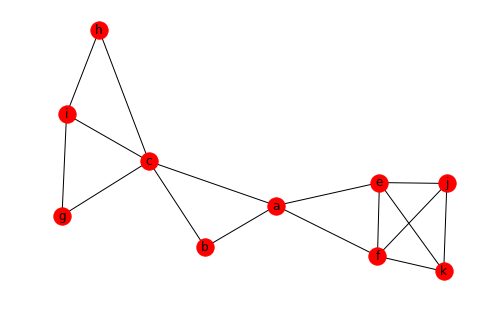

In [34]:
# create a graph object
g = nx.Graph()

# add an edge
g.add_edge("a", "b")
g.add_edge("b", "c")
g.add_edge("c", "a")
g.add_edge("e", "a")
g.add_edge("f", "a")
g.add_edge("c", "g")
g.add_edge("c", "h")
g.add_edge("c", "i")
g.add_edge("e", "j")
g.add_edge("e", "k")
g.add_edge("g", "i")
g.add_edge("h", "i")
g.add_edge("k", "j")
g.add_edge("k", "f")
g.add_edge("e", "f")
g.add_edge("j", "f")

# draw the graph using circular layout and display node labels
nx.draw_spring(g, with_labels=True)

In [35]:
print(nx.density(g))

0.35555555555555557


In [36]:
# compute node degrees of a graph
degree = nx.degree(g)
print(degree)
# convert it to pandas dataframe
df_degree = pd.DataFrame([x for x in degree], columns=["node", "degree"])
# sort nodes by degree in descending order
df_degree = df_degree.sort_values("degree", ascending=False)
print(df_degree)

[('a', 4), ('b', 2), ('c', 5), ('e', 4), ('f', 4), ('g', 2), ('h', 2), ('i', 3), ('j', 3), ('k', 3)]
  node  degree
2    c       5
0    a       4
3    e       4
4    f       4
7    i       3
8    j       3
9    k       3
1    b       2
5    g       2
6    h       2


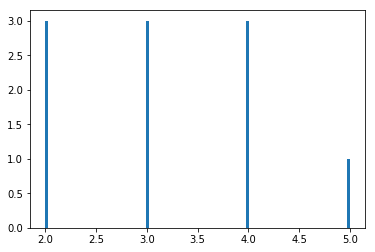

In [37]:
# degree histogram
from matplotlib import pyplot as plt
plt.hist([y for (x, y) in degree], bins=100);

In [38]:
# compute node betweenness of a graph
between = nx.betweenness_centrality(g)
# convert it to pandas dataframe
df_between = pd.DataFrame(list(between.items()), columns=["node", "betweenness"])
# sort nodes by betweenness in descending order
df_between = df_between.sort_values("betweenness", ascending=False)
print(df_between)

  node  betweenness
0    a     0.555556
2    c     0.513889
3    e     0.166667
4    f     0.166667
7    i     0.013889
1    b     0.000000
5    g     0.000000
6    h     0.000000
8    j     0.000000
9    k     0.000000


In [39]:
# compute node closeness of a graph
closeness = nx.closeness_centrality(g)

# convert it to pandas dataframe
df_closeness = pd.DataFrame(list(closeness.items()), columns=["node", "closeness"])

# sort nodes by closeness in descending order
df_closeness=df_closeness.sort_values("closeness", ascending=False)
print(df_closeness)

  node  closeness
0    a   0.642857
2    c   0.600000
3    e   0.529412
4    f   0.529412
1    b   0.500000
7    i   0.428571
5    g   0.409091
6    h   0.409091
8    j   0.391304
9    k   0.391304


In [40]:
# compute node eigenvector centrality of a graph
eigen = nx.eigenvector_centrality(g)

# convert it to pandas dataframe
df_eigen = pd.DataFrame(list(eigen.items()), columns=["node", "eigenvector centrality"])

# sort nodes by eivenvector centrality in descending order
df_eigen=df_eigen.sort_values("eigenvector centrality", ascending=False)
print(df_eigen)

  node  eigenvector centrality
3    e                0.449959
4    f                0.449959
0    a                0.396278
8    j                0.361667
9    k                0.361667
2    c                0.286624
1    b                0.195773
7    i                0.154712
5    g                0.126522
6    h                0.126522


In [41]:
# compute node PageRank centrality of a graph
pagerank = nx.pagerank_numpy(g)

# convert it to pandas dataframe
df_pagerank = pd.DataFrame(list(pagerank.items()), columns=["node", "pagerank"])

# sort nodes by pagerank in descending order
df_pagerank=df_pagerank.sort_values("pagerank", ascending=False)
print(df_pagerank)

  node  pagerank
2    c  0.158182
0    a  0.119753
3    e  0.115866
4    f  0.115866
7    i  0.102083
8    j  0.089641
9    k  0.089641
5    g  0.070815
6    h  0.070815
1    b  0.067338


In [42]:
components = list(nx.connected_component_subgraphs(g))
print("number of component:", len(components))
df_comp = pd.DataFrame()
df_comp["n_nodes"] = [c.number_of_nodes() for c in components]
print(df_comp.head())

number of component: 1
   n_nodes
0       10


In [43]:
# find cliques
for cliq in nx.find_cliques(g):
    print(cliq)

['k', 'e', 'j', 'f']
['c', 'b', 'a']
['c', 'i', 'h']
['c', 'i', 'g']
['e', 'a', 'f']


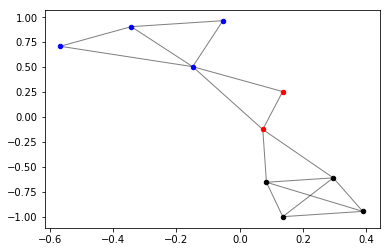

[('a', 0), ('b', 0), ('c', 1), ('e', 2), ('f', 2), ('g', 1), ('h', 1), ('i', 1), ('j', 2), ('k', 2)]


In [44]:
# in order to run the louvain community detection algorithm, you need to Anaconda Prompt and type:
# pip install --upgrade --force-reinstall python-louvain
import community
partition = community.best_partition(g)
#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(g)
count = 0
colors = ["r", "b", "k", "y"]
for com in set(partition.values()) :  
    list_nodes = [nodes for nodes in partition.keys()if partition[nodes] == com]
    nx.draw_networkx_nodes(g, pos, list_nodes, node_size = 20, node_color = colors[count])
    count += 1
nx.draw_networkx_edges(g, pos, alpha=0.5)
plt.show()
values = [(node, partition.get(node)) for node in g.nodes()]
print(values)